<a href="https://colab.research.google.com/github/Nagmashaik123/INFO5505MachineLearning/blob/main/Shaik_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade kneed

In [2]:
# Importing all the necessary Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.image import imread
from kneed import KneeLocator
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Loading the Training data set provided and dropping the nulls if there exists any
df_train_data = pd.read_csv('/content/ALS_TrainingData_2223.csv')
df_train_data.dropna()
df_train_data.shape

(2223, 101)

In [4]:
# Loading the Test data set provided and dropping the nulls if there exists any
df_test_data = pd.read_csv('/content/ALS_TestingData_78.csv')
df_test_data.dropna()
df_test_data.shape


(78, 131)

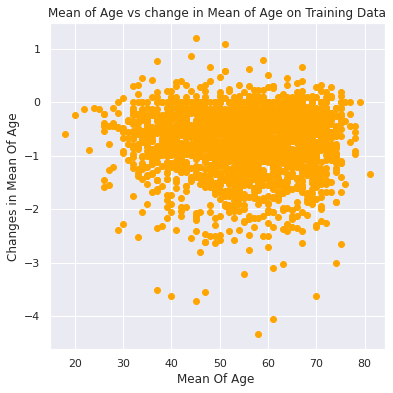

In [5]:
# Visualization of intial raw data i.e traning data
plt.figure(figsize=(6, 6))
plt.scatter(df_train_data['Age_mean'], df_train_data['ALSFRS_slope'],color='orange')
plt.xlabel('Mean Of Age ')
plt.ylabel('Changes in Mean Of Age')
plt.title('Mean of Age vs change in Mean of Age on Training Data');


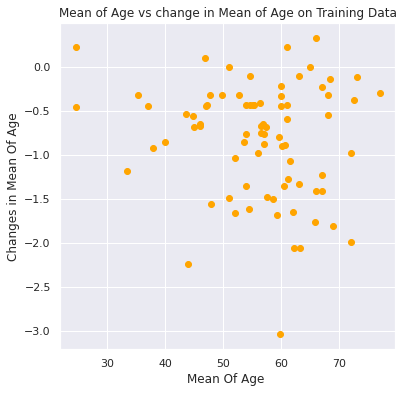

In [6]:
# Visualization of intial raw data i.e on  testing data
plt.figure(figsize=(6, 6))
plt.scatter(df_test_data['Age_mean'], df_test_data['ALSFRS_slope'],color='orange')
plt.xlabel('Mean Of Age ')
plt.ylabel('Changes in Mean Of Age')
plt.title('Mean of Age vs change in Mean of Age on Training Data');

In [7]:
# Preparing the data for the analysis
df_standard = StandardScaler().fit_transform(df_train_data)

In [8]:
#Applying K-Means to calculate centriods of clusters and inertia
k_means_data = KMeans(n_clusters=2, random_state=39, max_iter=100 )
k_means_data.fit(df_standard)
centroids_data = k_means_data.cluster_centers_
inertia_data = k_means_data.inertia_
print('SSE value of the analysis:', inertia_data)

SSE value of the analysis: 207788.85417228256


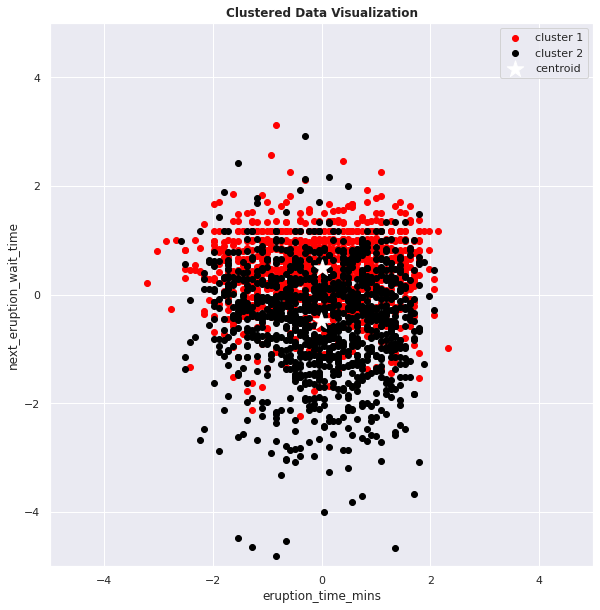

In [9]:
# Visualizing the plot with k-means analysed centroids
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df_standard[k_means_data.labels_ == 0, 1], df_standard[k_means_data.labels_ == 0, 6],
            c='red', label='cluster 1')
plt.scatter(df_standard[k_means_data.labels_ == 1, 1], df_standard[k_means_data.labels_ == 1, 6],
            c='black', label='cluster 2')
plt.scatter(centroids_data[:, 1], centroids_data[:, 6], marker='*', s=300,
            c='white', label='centroid')
# Applying the parameters of plot for the visualization graph
plt.legend()
plt.xlabel('eruption_time_mins')
plt.ylabel('next_eruption_wait_time')
plt.title('Clustered Data Visualization', fontweight='bold')
plt.xlim([-5, 5])
plt.ylim([-5, 5])
ax.set_aspect('equal')

In [10]:
# Computing Correlation values on the training data
corrrelation_train = df_train_data.corrwith(df_train_data['ALSFRS_slope'])
correlation_data_train = pd.DataFrame(corrrelation_train, columns = ['score'])

In [11]:
# printing positively Correlated with ALSFRS_slope values
print('ALSFRS_slope positively correlated: ' )
print(correlation_data_train[correlation_data_train['score'] >= 0.2])

ALSFRS_slope positively correlated: 
                        score
ALSFRS_slope         1.000000
ALSFRS_Total_median  0.247250
ALSFRS_Total_min     0.601810
hands_min            0.424107
leg_min              0.348967
mouth_median         0.244704
mouth_min            0.435538
respiratory_min      0.380749
trunk_min            0.488530


In [12]:
# printing negetively Correlated with ALSFRS_slope values
print('ALSFRS_slope negetively correlated: ' )
print(correlation_data_train[correlation_data_train['score'] <= -0.2])

ALSFRS_slope negetively correlated: 
                       score
Albumin_range      -0.226123
ALSFRS_Total_range -0.819305
hands_range        -0.632350
Hemoglobin_range   -0.209774
leg_range          -0.584507
mouth_range        -0.553194
onset_delta_mean   -0.324307
pulse_range        -0.236961
respiratory_range  -0.432878
trunk_range        -0.686407


In [13]:
## Chosing K value for clustering using elbow method
sse_list = []
cluster_list = list(range(1, 10))
for k in cluster_list:
    km_data = KMeans(n_clusters=k)
    km_data.fit(df_standard)
    sse_list.append(km_data.inertia_)

<Figure size 792x792 with 0 Axes>

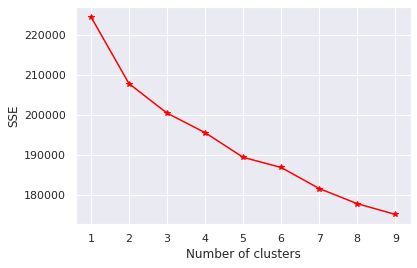

<Figure size 792x792 with 0 Axes>

In [14]:
# Visualization plot for K-Means Number of clusters vs SSE
plt.plot(cluster_list, sse_list, marker = '*',color='red')
plt.xlabel('Number of clusters')
plt.ylabel('SSE');
plt.figure(figsize=(11, 11))

In [15]:
kneeLocator_elbow = KneeLocator(range(1, 10), sse_list, curve="convex", direction="decreasing")
print("Values of KneeLocation elbows : ",kneeLocator_elbow.elbow)

Values of KneeLocation elbows :  3


In [16]:
#Calculating Silhouette Coefficient values
sil_coef_list=[]
for clust in range (2,11):
  kmeans_silhouette = KMeans(n_clusters = clust)
  kmeans_silhouette.fit(df_standard)
  sil_cof_score = silhouette_score(df_standard,kmeans_silhouette.labels_ )
  sil_coef_list.append(sil_cof_score)

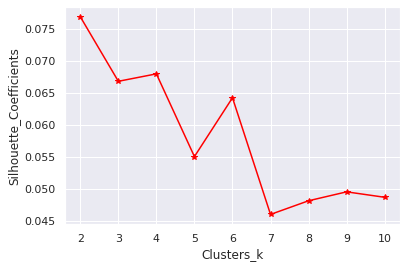

<Figure size 792x792 with 0 Axes>

In [17]:
# Visualization of the clusters drawn to the silhouette coefficients
x = []
for item in range(2, 11):
  x.append(item)
y=sil_coef_list
plt.plot(x, y, marker='*',color='red')
plt.xticks(x)
plt.xlabel('Clusters_k')
plt.ylabel('Silhouette_Coefficients')
plt.figure(figsize=(11, 11))
plt.show()

In [18]:
# Based on the two method depicted above the value of K selected is 3 for the analysis
k_accurate = KMeans(n_clusters = 3)
k_accurate.fit(df_standard)
pred = k_accurate.predict(df_standard)

In [19]:
# Calculated centroids for the clusters
centroids_clusters  = k_accurate.cluster_centers_
print("Calculated centroids for the clusters : ",centroids_clusters)

Calculated centroids for the clusters :  [[-3.41572738e-02  3.06623897e-01 -1.49522605e-01 -2.29528073e-01
  -2.97938077e-01  4.27593958e-01 -1.08313413e+00  8.90321995e-02
  -2.29827187e-01 -7.63088958e-01  1.22453338e+00  5.33791839e-02
  -9.20913691e-02 -1.01552128e-01  2.55885677e-01 -9.26733007e-03
  -4.64408291e-02 -4.24930516e-02  1.91894037e-01  3.35821952e-01
   3.47094270e-01  3.20405482e-01  5.18654677e-01  7.36828346e-02
   9.90608242e-02  7.56358529e-02  4.16179659e-01 -9.31276793e-02
  -1.02546626e-01 -8.85196618e-02  3.31274917e-01  3.70604579e-02
  -2.68283274e-02 -8.96406617e-02  4.69795357e-01 -5.40539798e-02
  -4.52672931e-02  2.72837433e-02  1.45060929e-01 -3.16802373e-01
  -3.90111715e-01 -4.12642433e-01  5.67478518e-01  4.74489377e-02
   3.26124960e-02 -8.57890581e-02  4.71652970e-01 -1.78128582e-01
   4.38180051e-02  2.27791281e-02  6.89184090e-02  2.54790707e-01
   2.96241748e-01  1.33822234e-01 -2.64911659e-01  8.57961871e-01
   1.15271351e-02 -1.13038186e-02 -

In [21]:
# Centroids to interpret the clusters
centroids_clusters  = k_accurate.cluster_centers_
centroids_df = pd.DataFrame(centroids_clusters, columns = df_train_data.columns)
print(' The Table of Centroids',centroids_df)


 The Table of Centroids          ID  Age_mean  Albumin_max  ...  Urine.Ph_max  Urine.Ph_median  Urine.Ph_min
0 -0.034157  0.306624    -0.149523  ...      0.115414         0.128338     -0.015845
1  0.047688  0.009538     0.102703  ...     -0.102602        -0.055519     -0.025408
2 -0.039811 -0.220031    -0.034347  ...      0.057291        -0.013574      0.044243

[3 rows x 101 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

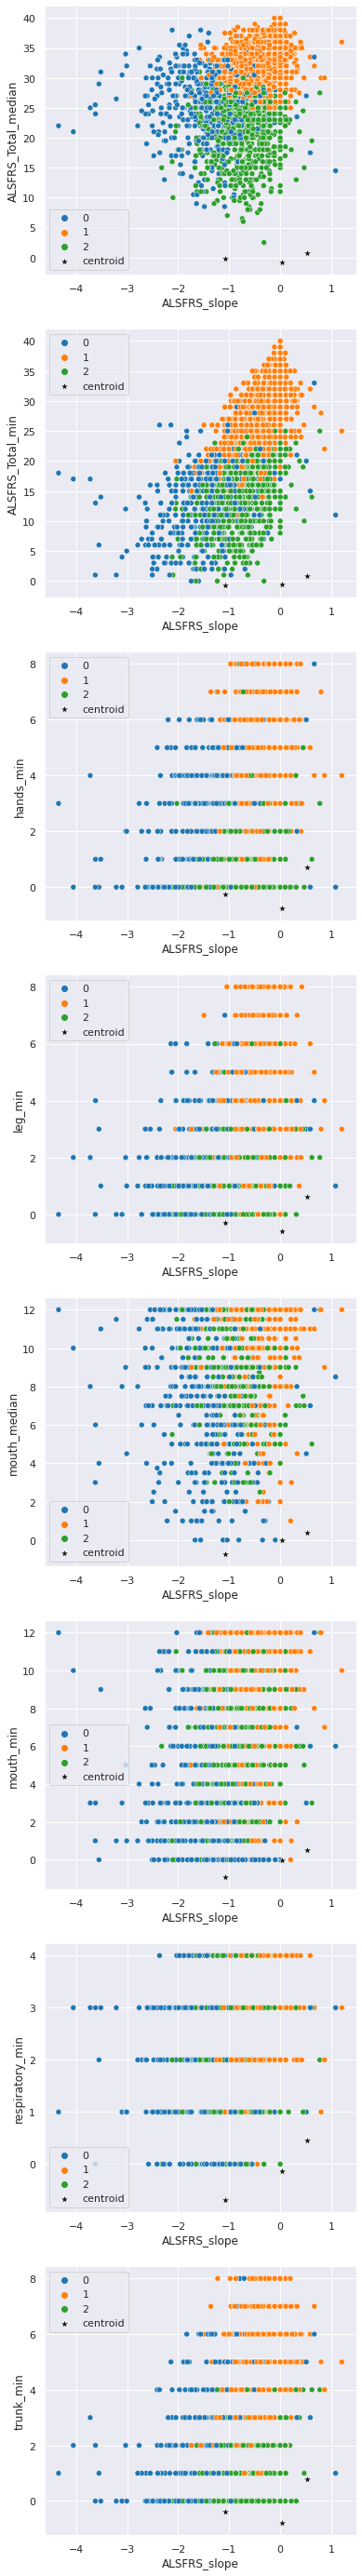

In [23]:
# Visualizing the dataplot for different clusters
df_train_data['cluster'] = pred

labelList = ['ALSFRS_Total_median','ALSFRS_Total_min', 'hands_min',  'leg_min', 'mouth_median', 'mouth_min', 'respiratory_min', 'trunk_min']

fig, ax = plt.subplots(8,1,figsize=(6,50))
for item,yVal in enumerate(labelList):
  sns.scatterplot ('ALSFRS_slope', yVal, hue = 'cluster', palette= 'tab10', data = df_train_data, ax=ax[item])
  sns.scatterplot ('ALSFRS_slope' , yVal,   color='.1', s = 100, marker="*",label = 'centroid', data = centroids_df, ax=ax[item])

In [25]:
# Validating the results using Testing data
df_std_test = StandardScaler().fit_transform(df_test_data)

In [26]:
k_means_test= KMeans(n_clusters = 3)
k_means_test.fit(df_std_test)
test_pred = k_means_test.predict(df_std_test)

In [27]:
#Validating the values of centroids
centr  = k_means_test.cluster_centers_
centroids_df = pd.DataFrame(centr, columns = df_test_data.columns)
centroids_df = centroids_df['ALSFRS_slope']
print('The values of Centroids',centroids_df)


The values of Centroids 0   -0.552610
1   -0.023096
2    0.211443
Name: ALSFRS_slope, dtype: float64
